In [1]:
from mitotic_classifer import *


# Running SVM model with file:230109_CellCycleExp_RPE1cdk1as_Rep3_5uM#
## check the number of M and G2 cells


In [2]:
df_ori=pd.read_csv('/Users/haoranyue/Downloads/OneDrive_1_01-02-2023/230109_CellCycleExp_RPE1cdk1as_Rep3_5uM_final_data.csv')
df_cellcyle=pd.read_csv('/Users/haoranyue/Downloads/OneDrive_1_01-02-2023/230109_CellCycleExp_RPE1cdk1as_Rep3_5uM_singlecell_cellcycle.csv')
df_cellcyle.groupby('cell_cycle_detailed').count()

,Unnamed: 0,experiment,plate_id,well,well_id,image_id,cell_line,condition,Cyto_ID,area_cell,...,DAPI_total_norm_log2,EdU_mean_corr_norm,EdU_mean_corr_norm_log2,H3P_mean_corr_norm,H3P_mean_corr_norm_log2,area_cell_norm,area_cell_norm_log2,area_nucleus_norm,area_nucleus_norm_log2,cell_cycle
cell_cycle_detailed,,,,,,,,,,,,,,,,,,,,,
Early S,3559,3559,3559,3559,3559,3559,3559,3559,3559,3559,...,3559,3559,3559,3559,3559,3559,3559,3559,3559,3559
G1,32864,32864,32864,32864,32864,32864,32864,32864,32864,32864,...,32864,32864,32864,32864,32864,32864,32864,32864,32864,32864
G2,17618,17618,17618,17618,17618,17618,17618,17618,17618,17618,...,17618,17618,17618,17618,17618,17618,17618,17618,17618,17618
Late S,2309,2309,2309,2309,2309,2309,2309,2309,2309,2309,...,2309,2309,2309,2309,2309,2309,2309,2309,2309,2309
M,76,76,76,76,76,76,76,76,76,76,...,76,76,76,76,76,76,76,76,76,76
Polyploid,1549,1549,1549,1549,1549,1549,1549,1549,1549,1549,...,1549,1549,1549,1549,1549,1549,1549,1549,1549,1549
Polyploid (replicating),208,208,208,208,208,208,208,208,208,208,...,208,208,208,208,208,208,208,208,208,208
Sub-G1,203,203,203,203,203,203,203,203,203,203,...,203,203,203,203,203,203,203,203,203,203


## Merge two files

In [3]:


df_all=merge_data(df1=df_ori,df2=df_cellcyle,merge_clue_columns='well_id',merge_key_columns=['experiment','plate_id','well_id','cell_line','condition','Cyto_ID','intensity_mean_EdU_cyto','intensity_mean_H3P_cyto','area_cell','area_nucleus',])
df_all.groupby('cell_cycle').count()

,Unnamed: 0_x,experiment,plate_id,well_x,well_id,image_id_x,cell_line,condition,label,area_nucleus,...,DAPI_total_norm_log2,EdU_mean_corr_norm,EdU_mean_corr_norm_log2,H3P_mean_corr_norm,H3P_mean_corr_norm_log2,area_cell_norm,area_cell_norm_log2,area_nucleus_norm,area_nucleus_norm_log2,cell_cycle_detailed
cell_cycle,,,,,,,,,,,,,,,,,,,,,
G1,32713,32713,32713,32713,32713,32713,32713,32713,32713,32713,...,32713,32713,32713,32713,32713,32713,32713,32713,32713,32713
G2/M,16872,16872,16872,16872,16872,16872,16872,16872,16872,16872,...,16872,16872,16872,16872,16872,16872,16872,16872,16872,16872
Polyploid,908,908,908,908,908,908,908,908,908,908,...,908,908,908,908,908,908,908,908,908,908
Polyploid (replicating),116,116,116,116,116,116,116,116,116,116,...,116,116,116,116,116,116,116,116,116,116
S,5766,5766,5766,5766,5766,5766,5766,5766,5766,5766,...,5766,5766,5766,5766,5766,5766,5766,5766,5766,5766
Sub-G1,195,195,195,195,195,195,195,195,195,195,...,195,195,195,195,195,195,195,195,195,195


## select all the M cell and equal number G2 cells, extracting the interesting columns making a dataset for training
# without Edu

In [4]:
data=pd.concat([df_all[df_all['cell_cycle_detailed']=="M"],df_all[df_all['cell_cycle_detailed']=="G2"].head(72)])[[ 'cell_line', 'condition', 'label', 'area_nucleus',
       'intensity_max_DAPI_nucleus', 'intensity_mean_DAPI_nucleus',
       'integrated_int_DAPI', 'area_cell', 'intensity_max_DAPI_cell',
       'intensity_mean_DAPI_cell',
       'intensity_max_Tub_nucleus',
       'intensity_mean_Tub_nucleus', 'intensity_max_Tub_cell',
       'intensity_mean_Tub_cell', 'intensity_max_Tub_cyto',
       'intensity_mean_Tub_cyto',
       'nuclei_count', 'DAPI_total',
       'DAPI_total_norm',
       'EdU_mean_corr_norm',
       'area_cell_norm',
       'area_nucleus_norm','cell_cycle_detailed','cell_cycle']].sample(frac=1).reset_index(drop=True)
data

,cell_line,condition,label,area_nucleus,intensity_max_DAPI_nucleus,intensity_mean_DAPI_nucleus,integrated_int_DAPI,area_cell,intensity_max_DAPI_cell,intensity_mean_DAPI_cell,...,intensity_max_Tub_cyto,intensity_mean_Tub_cyto,nuclei_count,DAPI_total,DAPI_total_norm,EdU_mean_corr_norm,area_cell_norm,area_nucleus_norm,cell_cycle_detailed,cell_cycle
0,RPE-1,DMSO,88.0,182.0,19256.739706,12238.744150,2.227451e+06,897,19256.739706,3629.816985,...,13600.454443,7915.026365,1,2.227451e+06,3.731112,1.043518,0.650568,1.201078,G2,G2/M
1,RPE-1,DMSO,291.0,116.0,31069.798862,17243.523619,2.000249e+06,462,31069.798862,6011.421789,...,19651.498857,6822.998417,1,2.000249e+06,3.350534,0.984291,0.335075,0.765523,M,G2/M
2,RPE-1,DMSO,40.0,367.0,11472.381823,7074.819377,2.596459e+06,4355,11472.381823,1470.817586,...,12737.208293,6975.432422,1,2.596459e+06,4.349220,0.955122,3.158553,2.421955,G2,G2/M
3,RPE-1,NT,61.0,162.0,16772.957128,11702.093566,1.895739e+06,720,16772.957128,3757.599448,...,53285.968577,11222.909652,1,1.895739e+06,3.175474,1.081970,0.522195,1.069092,M,G2/M
4,RPE-1,DMSO,212.0,121.0,35835.211145,21936.089545,2.654267e+06,483,35835.211145,7534.870704,...,23763.194379,9489.596779,1,2.654267e+06,4.446052,0.997024,0.350306,0.798519,M,G2/M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,RPE-1,DMSO,219.0,220.0,14510.408168,10079.773205,2.217550e+06,1595,14510.408168,2384.249517,...,20559.531899,8804.502940,1,2.217550e+06,3.714526,0.978521,1.156806,1.451853,G2,G2/M
140,RPE-1,NT,214.0,168.0,37070.505182,17259.523478,2.899600e+06,629,37070.505182,6873.595769,...,17251.680757,8552.391615,1,2.899600e+06,4.857000,1.027528,0.456195,1.108688,M,G2/M
141,RPE-1,DMSO,103.0,153.0,23658.260301,14936.018013,2.285211e+06,717,23658.260301,4514.766704,...,16860.587351,9851.434735,1,2.285211e+06,3.827862,1.028202,0.520019,1.009698,G2,G2/M
142,RPE-1,TAK931_24h,99.0,129.0,34531.119578,18117.980680,2.337220e+06,565,34531.119578,6361.654591,...,18455.870537,8347.071622,1,2.337220e+06,3.914980,1.036728,0.409778,0.851314,M,G2/M


# input data (72 G2 cell + 72 M cell)
##  cross validation

the selected model: SVC(C=100, decision_function_shape='ovo', random_state=42)  Score:[0.8        0.8        0.8        0.7        0.9        0.9
 1.         1.         1.         0.77777778]  Mean:0.8677777777777779


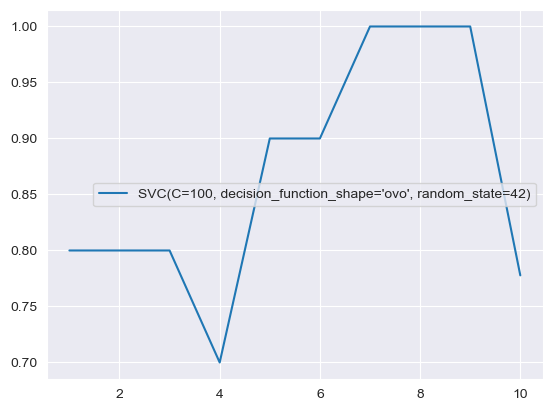

In [5]:
x_train,x_test,y_train,y_test=preprecess_classifier(data,features=[ 'intensity_max_DAPI_nucleus', 'intensity_mean_DAPI_nucleus',
       'integrated_int_DAPI',  'intensity_max_DAPI_cell','intensity_mean_DAPI_cell',
       'intensity_max_Tub_nucleus','intensity_mean_Tub_nucleus', 'intensity_max_Tub_cell','intensity_mean_Tub_cell', 'intensity_max_Tub_cyto','intensity_mean_Tub_cyto',
       'DAPI_total_norm',
       'area_cell_norm',
       'area_nucleus_norm',
       ],label='cell_cycle_detailed')

the accuracy of model run with train data 1.0
the accuracy of model run with test data 0.875


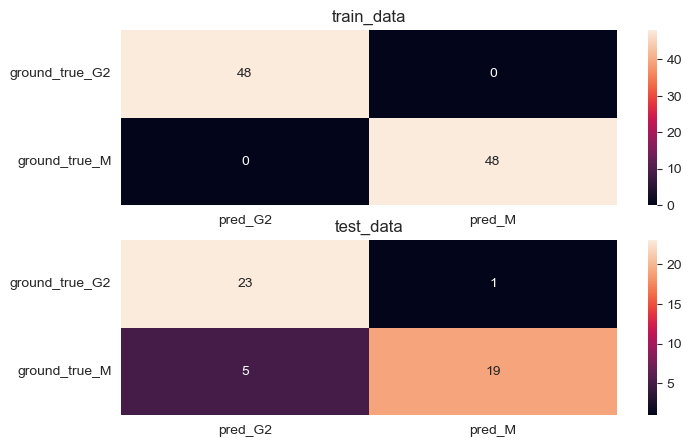

In [6]:
clf_svm_hp=svm.SVC( random_state=24,C=100,gamma='scale',decision_function_shape='ovo',kernel='rbf')
check_classifier(clf=clf_svm_hp,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test)

# pre-trained SVM

the accuracy of model run with train data 1.0
the accuracy of model run with test data 0.875


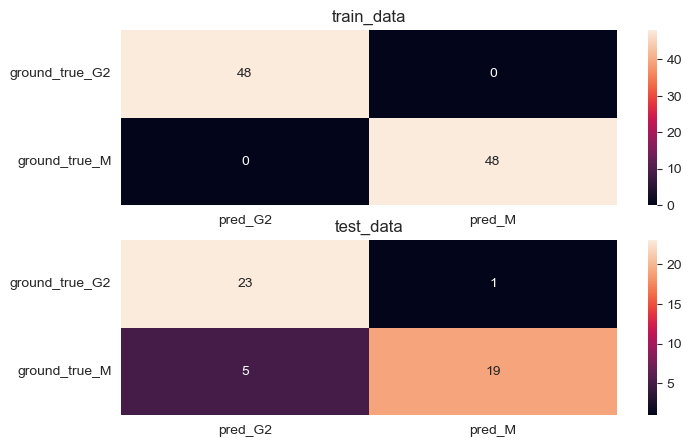

In [7]:
from joblib import dump, load
pretrained_svm=load('pretrained_SVM_U20S_without_edu.joblib')
check_classifier(clf=pretrained_svm,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test)


# include EdU

In [8]:
data=pd.concat([df_all[df_all['cell_cycle_detailed']=="M"],df_all[df_all['cell_cycle_detailed']=="G2"].head(72)])[[ 'cell_line', 'condition', 'label', 'area_nucleus',
       'intensity_max_DAPI_nucleus', 'intensity_mean_DAPI_nucleus',
       'integrated_int_DAPI', 'area_cell', 'intensity_max_DAPI_cell',
       'intensity_mean_DAPI_cell',
       'intensity_max_Tub_nucleus',                                                                                                             'intensity_max_EdU_nucleus',
       'intensity_mean_EdU_nucleus', 'intensity_max_EdU_cell',
       'intensity_mean_EdU_cell', 'intensity_max_EdU_cyto',
       'intensity_mean_EdU_cyto',
       'intensity_mean_Tub_nucleus', 'intensity_max_Tub_cell',
       'intensity_mean_Tub_cell', 'intensity_max_Tub_cyto',
       'intensity_mean_Tub_cyto',
       'nuclei_count', 'DAPI_total',
       'DAPI_total_norm',
       'EdU_mean_corr_norm',
       'area_cell_norm',
       'area_nucleus_norm','cell_cycle_detailed']].sample(frac=1).reset_index(drop=True)
data


,cell_line,condition,label,area_nucleus,intensity_max_DAPI_nucleus,intensity_mean_DAPI_nucleus,integrated_int_DAPI,area_cell,intensity_max_DAPI_cell,intensity_mean_DAPI_cell,...,intensity_mean_Tub_cell,intensity_max_Tub_cyto,intensity_mean_Tub_cyto,nuclei_count,DAPI_total,DAPI_total_norm,EdU_mean_corr_norm,area_cell_norm,area_nucleus_norm,cell_cycle_detailed
0,RPE-1,DMSO,103.0,153.0,23658.260301,14936.018013,2.285211e+06,717,23658.260301,4514.766704,...,9715.004421,16860.587351,9851.434735,1,2.285211e+06,3.827862,1.028202,0.520019,1.009698,G2
1,RPE-1,Palb_12h,18.0,115.0,25154.978825,18259.908986,2.099890e+06,426,25154.978825,6862.792839,...,10564.276635,33169.208596,11006.581850,1,2.099890e+06,3.517438,1.130175,0.308965,0.758923,M
2,RPE-1,DMSO,133.0,227.0,14676.814450,9468.491439,2.149348e+06,1497,14676.814450,2318.808244,...,6185.803414,12218.580467,6008.741508,1,2.149348e+06,3.600283,1.011335,1.085730,1.498048,G2
3,RPE-1,DMSO,246.0,319.0,10227.359961,7877.965642,2.513071e+06,1968,10227.359961,2244.649904,...,6089.582495,12294.144857,6350.363842,1,2.513071e+06,4.209541,0.950596,1.427332,2.105187,G2
4,RPE-1,NT,239.0,102.0,39310.784626,23137.267554,2.360001e+06,539,39310.784626,6496.132885,...,10476.524016,22364.099138,8977.733958,1,2.360001e+06,3.953140,1.034961,0.390921,0.673132,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,RPE-1,DMSO,222.0,285.0,14820.842590,9423.223552,2.685619e+06,1714,14820.842590,2595.656141,...,8111.753975,13879.290470,8093.564992,1,2.685619e+06,4.498569,0.952054,1.243114,1.880810,G2
140,RPE-1,NT,180.0,116.0,34292.032797,17973.115961,2.084881e+06,590,34292.032797,5533.008170,...,10722.857321,27631.337430,8932.832699,1,2.084881e+06,3.492299,1.045731,0.427910,0.765523,M
141,RPE-1,DMSO,68.0,235.0,16528.239572,10828.789221,2.544765e+06,1349,16528.239572,3027.243318,...,7925.139147,15752.382242,8055.727323,1,2.544765e+06,4.262631,0.968076,0.978390,1.550843,G2
142,RPE-1,DMSO,20.0,316.0,11629.095049,7748.195054,2.448430e+06,2060,11629.095049,2043.676516,...,6976.495853,12695.231628,6936.035638,1,2.448430e+06,4.101263,0.954841,1.494057,2.085389,G2


the selected model: SVC(C=100, decision_function_shape='ovo', random_state=42)  Score:[0.9        0.8        1.         1.         1.         0.9
 0.88888889 1.         1.         0.88888889]  Mean:0.9377777777777778


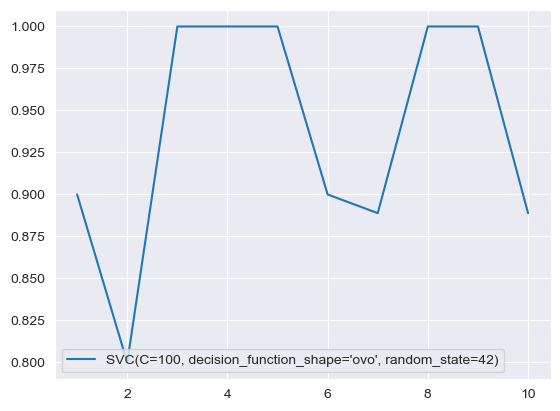

the accuracy of model run with train data 1.0
the accuracy of model run with test data 0.9583333333333334


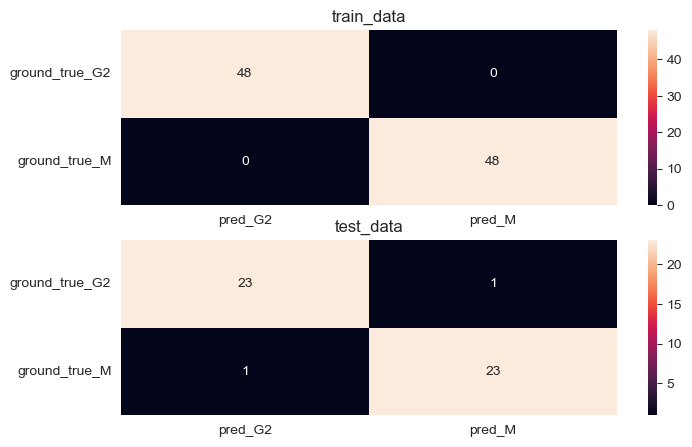

In [9]:
x_train,x_test,y_train,y_test=preprecess_classifier(data,features=[ 'intensity_max_DAPI_nucleus', 'intensity_mean_DAPI_nucleus',
       'integrated_int_DAPI',  'intensity_max_DAPI_cell','intensity_mean_DAPI_cell',
       'intensity_max_Tub_nucleus','intensity_mean_Tub_nucleus', 'intensity_max_Tub_cell','intensity_mean_Tub_cell', 'intensity_max_Tub_cyto','intensity_mean_Tub_cyto',
       'intensity_max_EdU_nucleus', 'intensity_mean_EdU_nucleus', 'intensity_max_EdU_cell','intensity_mean_EdU_cell', 'intensity_max_EdU_cyto','intensity_mean_EdU_cyto',
       'DAPI_total_norm',
       'area_cell_norm',
       'EdU_mean_corr_norm',
       'area_nucleus_norm',
       ],label='cell_cycle_detailed')
clf_svm_hp = svm.SVC( random_state=24,C=100,gamma='scale',decision_function_shape='ovo',kernel='rbf')
check_classifier(clf=clf_svm_hp,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test)

the accuracy of model run with train data 1.0
the accuracy of model run with test data 0.9583333333333334


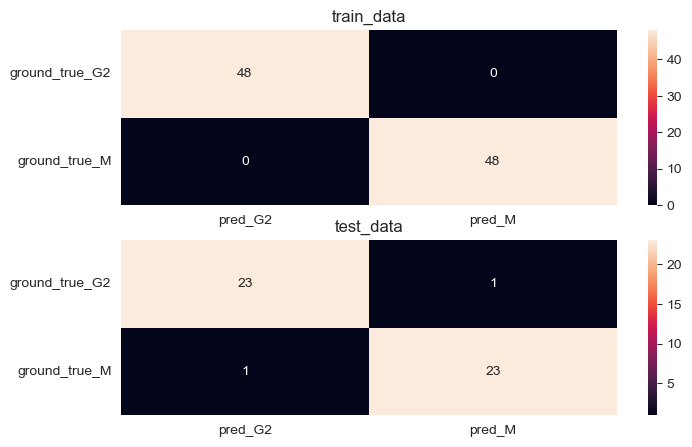

In [10]:
from joblib import dump, load
# dump(clf_svm_hp, 'pretrained_SVM_U20S_with_edu.joblib')
pretrained_svm=load('pretrained_SVM_U20S_with_edu.joblib')
check_classifier(clf=pretrained_svm,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test)

# classification  of G1 S and G2/M
# without Edu

the selected model: SVC(C=100, decision_function_shape='ovo', random_state=42)  Score:[0.78682842 0.78682842 0.8065915  0.78751084 0.79618387 0.78404163
 0.79618387 0.78924545 0.78490893 0.79184735]  Mean:0.7910170288945574


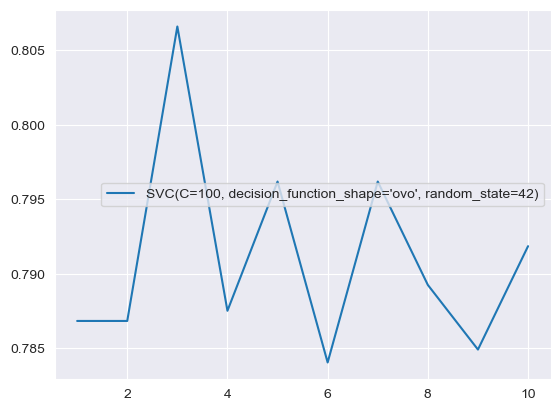

the accuracy of model run with train data 0.8349809226500173
the accuracy of model run with test data 0.8000346860908776


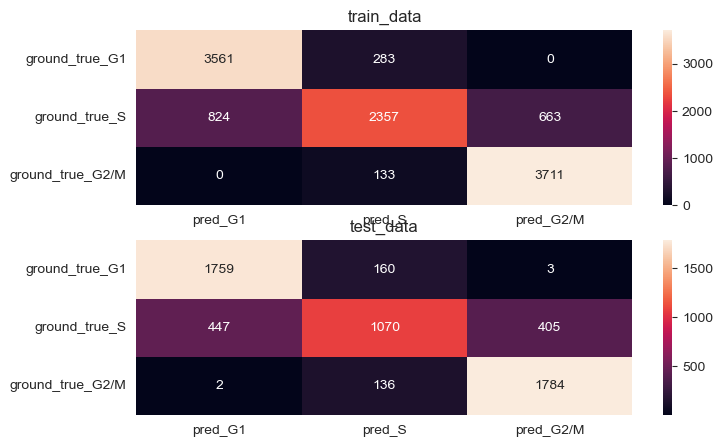

In [11]:
data_G1_S_G2_M=pd.concat([df_all[df_all['cell_cycle']=="G2/M"].head(5766),df_all[df_all['cell_cycle_detailed']=="G1"].head(5766),df_all[df_all['cell_cycle']=="S"]])[[ 'cell_line', 'condition', 'label', 'area_nucleus',
       'intensity_max_DAPI_nucleus', 'intensity_mean_DAPI_nucleus',
       'integrated_int_DAPI', 'area_cell', 'intensity_max_DAPI_cell','intensity_mean_DAPI_cell',
       'intensity_max_Tub_nucleus','intensity_mean_Tub_nucleus', 'intensity_max_Tub_cell','intensity_mean_Tub_cell', 'intensity_max_Tub_cyto','intensity_mean_Tub_cyto',
       'intensity_max_EdU_nucleus', 'intensity_mean_EdU_nucleus', 'intensity_max_EdU_cell','intensity_mean_EdU_cell', 'intensity_max_EdU_cyto','intensity_mean_EdU_cyto',
       'intensity_max_Tub_nucleus',
       'intensity_mean_Tub_nucleus', 'intensity_max_Tub_cell',
       'intensity_mean_Tub_cell', 'intensity_max_Tub_cyto',
       'intensity_mean_Tub_cyto',
       'nuclei_count', 'DAPI_total',
       'DAPI_total_norm',
       'EdU_mean_corr_norm',
       'area_cell_norm',
       'area_nucleus_norm','cell_cycle']].sample(frac=1).reset_index(drop=True)



x_train,x_test,y_train,y_test=preprecess_classifier(data_G1_S_G2_M,features=[ 'intensity_max_DAPI_nucleus', 'intensity_mean_DAPI_nucleus',
       'integrated_int_DAPI',  'intensity_max_DAPI_cell','intensity_mean_DAPI_cell',
       'intensity_max_Tub_nucleus','intensity_mean_Tub_nucleus', 'intensity_max_Tub_cell','intensity_mean_Tub_cell', 'intensity_max_Tub_cyto','intensity_mean_Tub_cyto',
       'DAPI_total_norm',
       'area_cell_norm',
       'area_nucleus_norm',
       ],label='cell_cycle')
clf_svm_hp=svm.SVC( random_state=24,C=100,gamma='scale',decision_function_shape='ovo',kernel='rbf')
check_classifier_G1_S_G2M(clf=clf_svm_hp,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test)


# with Edu

the selected model: SVC(C=100, decision_function_shape='ovo', random_state=42)  Score:[0.99133449 0.98353553 0.99045967 0.98959237 0.99132697 0.98699046
 0.99132697 0.98525585 0.98699046 0.99045967]  Mean:0.9887272445778551


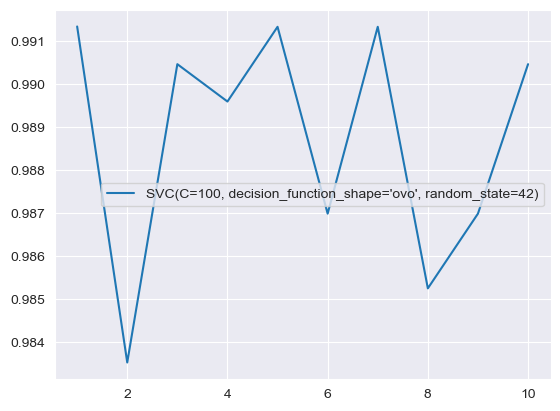

the accuracy of model run with train data 0.9994797086368367
the accuracy of model run with test data 0.9890738813735692


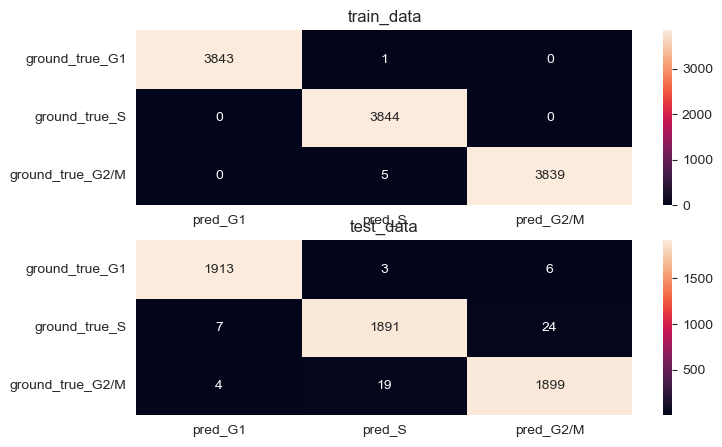

In [12]:
x_train,x_test,y_train,y_test=preprecess_classifier(data_G1_S_G2_M,features=[ 'intensity_max_DAPI_nucleus', 'intensity_mean_DAPI_nucleus',
       'integrated_int_DAPI',  'intensity_max_DAPI_cell','intensity_mean_DAPI_cell',
       'intensity_max_Tub_nucleus','intensity_mean_Tub_nucleus', 'intensity_max_Tub_cell','intensity_mean_Tub_cell', 'intensity_max_Tub_cyto','intensity_mean_Tub_cyto',
       'intensity_max_EdU_nucleus', 'intensity_mean_EdU_nucleus', 'intensity_max_EdU_cell','intensity_mean_EdU_cell', 'intensity_max_EdU_cyto','intensity_mean_EdU_cyto',
       'DAPI_total_norm',
       'area_cell_norm',
       'EdU_mean_corr_norm',
       'area_nucleus_norm',
       ],label='cell_cycle')
clf_svm_hp=svm.SVC( random_state=24,C=100,gamma='scale',decision_function_shape='ovo',kernel='rbf')
check_classifier_G1_S_G2M(clf=clf_svm_hp,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test)
